# Energy Efficiency

[Fuente de datos](https://archive.ics.uci.edu/dataset/242/energy+efficiency)
 
[Listado de repositorios tec](https://experiencia21.tec.mx/courses/530360/pages/evaluacion)

El set de datos contiene 768 registros, con 8 variables independientes y 2 variables dependientes (variables objetivo). Estas variables independientes son los parámetros del edificio. Las variables dependientes son las cargas de calefacción y refrigeración de dichos edificios.



## Descripción del Problema <br>

Según **Energy.gov**, los sistemas de calefacción, ventilación y aire acondicionado (**HVAC**) representan aproximadamente el **35%** del consumo energético de un edificio. Dado que las personas pasan una cantidad significativa de tiempo en interiores, tanto en sus hogares como en lugares de trabajo, es cada vez más importante priorizar diseños que ofrezcan entornos cómodos, rentables y seguros.

El objetivo de nuestro estudio es explorar si el **aprendizaje automático** puede predecir con precisión las cargas de calefacción y enfriamiento basándose en parámetros básicos de construcción, con el propósito de diseñar edificios más eficientes energéticamente. Utilizaremos un conjunto de datos de **UCI**, que incluye cargas conocidas de calefacción (**HL**) y de enfriamiento (**CL**), para examinar la influencia de ocho variables de entrada: **compacidad relativa (X1)**, **área superficial (X2)**, **área de paredes (X3)**, **área del techo (X4)**, **altura total (X5)**, **orientación (X6)**, **área acristalada (X7)** y **distribución del área acristalada (X8)**. Se empleará un modelo de regresión supervisada para predecir las cargas de calefacción y enfriamiento esperadas.

---

### **KPIs:**

- Medición de cargas energéticas: <b>y1 (carga de calefacción)</b> y <b>y2 (carga de enfriamiento)</b><br>
- Carga energética menor a 20 = baja<br>
- Carga energética entre 30 y 40 = media<br>
- Carga energética igual o superior a 40 = alta<br>

---

## Diccionario de Datos <br>

| Columna | Nombre | Tipo de Dato | Descripción |
|---------|--------|--------------|-------------|
| X1 | Compacidad Relativa | float | desconocido <br> |
| X2 | Área Superficial | float | suma de áreas de paredes y techo <br> |
| X3 | Área de Paredes | float | suma de áreas de las paredes <br> |
| X4 | Área del Techo | float | área del techo <br> |
| X5 | Altura Total | float | 1 o 2 pisos de altura <br> |
| X6 | Orientación | int | Norte, Sur, Este, Oeste <br> |
| X7 | Área Acristalada | float | desconocido <br> |
| X8 | Distribución del Área Acristalada | int | desconocido <br> |
| y1 | Carga de Calefacción | float | Coste energético para calentar el edificio <br> |
| y2 | Carga de Enfriamiento | float | Coste energético para enfriar el edificio <br> | 

---


**IMPORTACION DE LIBRERIAS**

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

## 1) Lecture de datos 

In [2]:
# Getting the root path 
path = os.getcwd()  # Obtiene el directorio actual
parent_path = os.path.dirname(path)  # Retrocede una carpeta
print(f"Directorio padre: {parent_path}")

Directorio padre: /Users/luis.farfan/Documents/MNA-local/mlops/tarea1/mlops


In [3]:
dataset = pd.read_excel(io= parent_path + "/data/01_raw/ENB2012_data.xlsx")
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


**Renaming variables**

In [4]:
dataset.rename(columns={"X1": "Relative_Compactness", 
                        "X2": "Surface_Area", 
                        "X3": "Wall_Area", 
                        "X4": "Roof_Area",
                        "X5": "Overall_Height", 
                        "X6": "Orientation", 
                        "X7": "Glazing Area", 
                        "X8": "Glazing Area Distribution", 
                        "Y1": "Heating Load", 
                        "Y2": "Cooling Load"
                       }, inplace=True)

dataset.head(n=5)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## 2) Análisis exploratorio de datos 

**TAMAÑO DEL SET DE DATOS**

In [5]:
shape = dataset.shape
shape = {"Cantidad de columnas":[shape[1]], 
         "Cantidad de filas":[shape[0]]
         }

# Lo convertimos en una pandas DF 
shape = pd.DataFrame(data=shape)
shape

,Cantidad de columnas,Cantidad de filas
0,10,768


### 2.1) Análisis univariable 
En esta sección se hará análisis de manera individual a cada una de las variables

#### 2.1.1) Tipo de variables en el set de datos 

In [6]:
dataset.dtypes # Podemos observar que  la mayoría de las variables son de tipo flotante. Con excepción a 2 de tipo entero que son la de Orientation y Glazing Area Distribution. 


Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

#### 2.1.2) Estadística descriptiva general 

In [7]:
dataset.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


#### 2.1.3) Inspección de registros nulos 

In [8]:
dataset.isnull().sum()  # No existen valores nulos 


Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

#### 2.1.4) Histograma, distribución de variables 

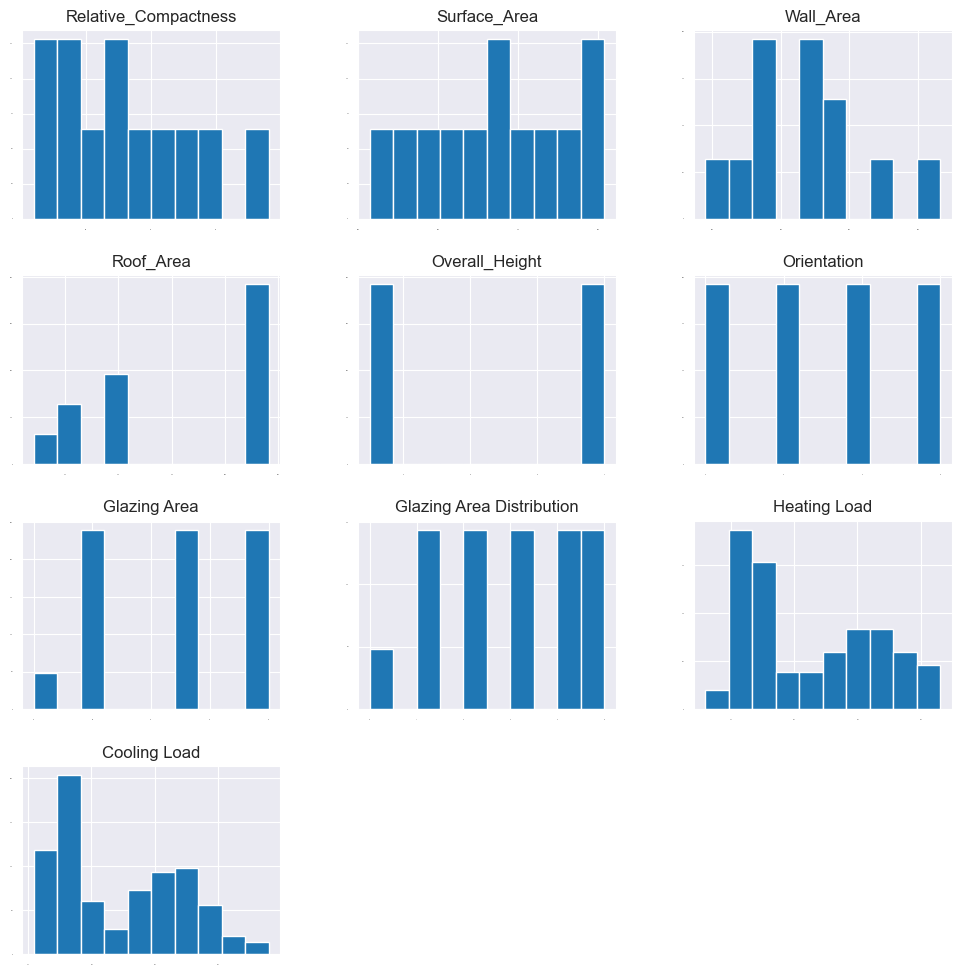

In [9]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

#### 2.1.5) Box plot, distribución de variables

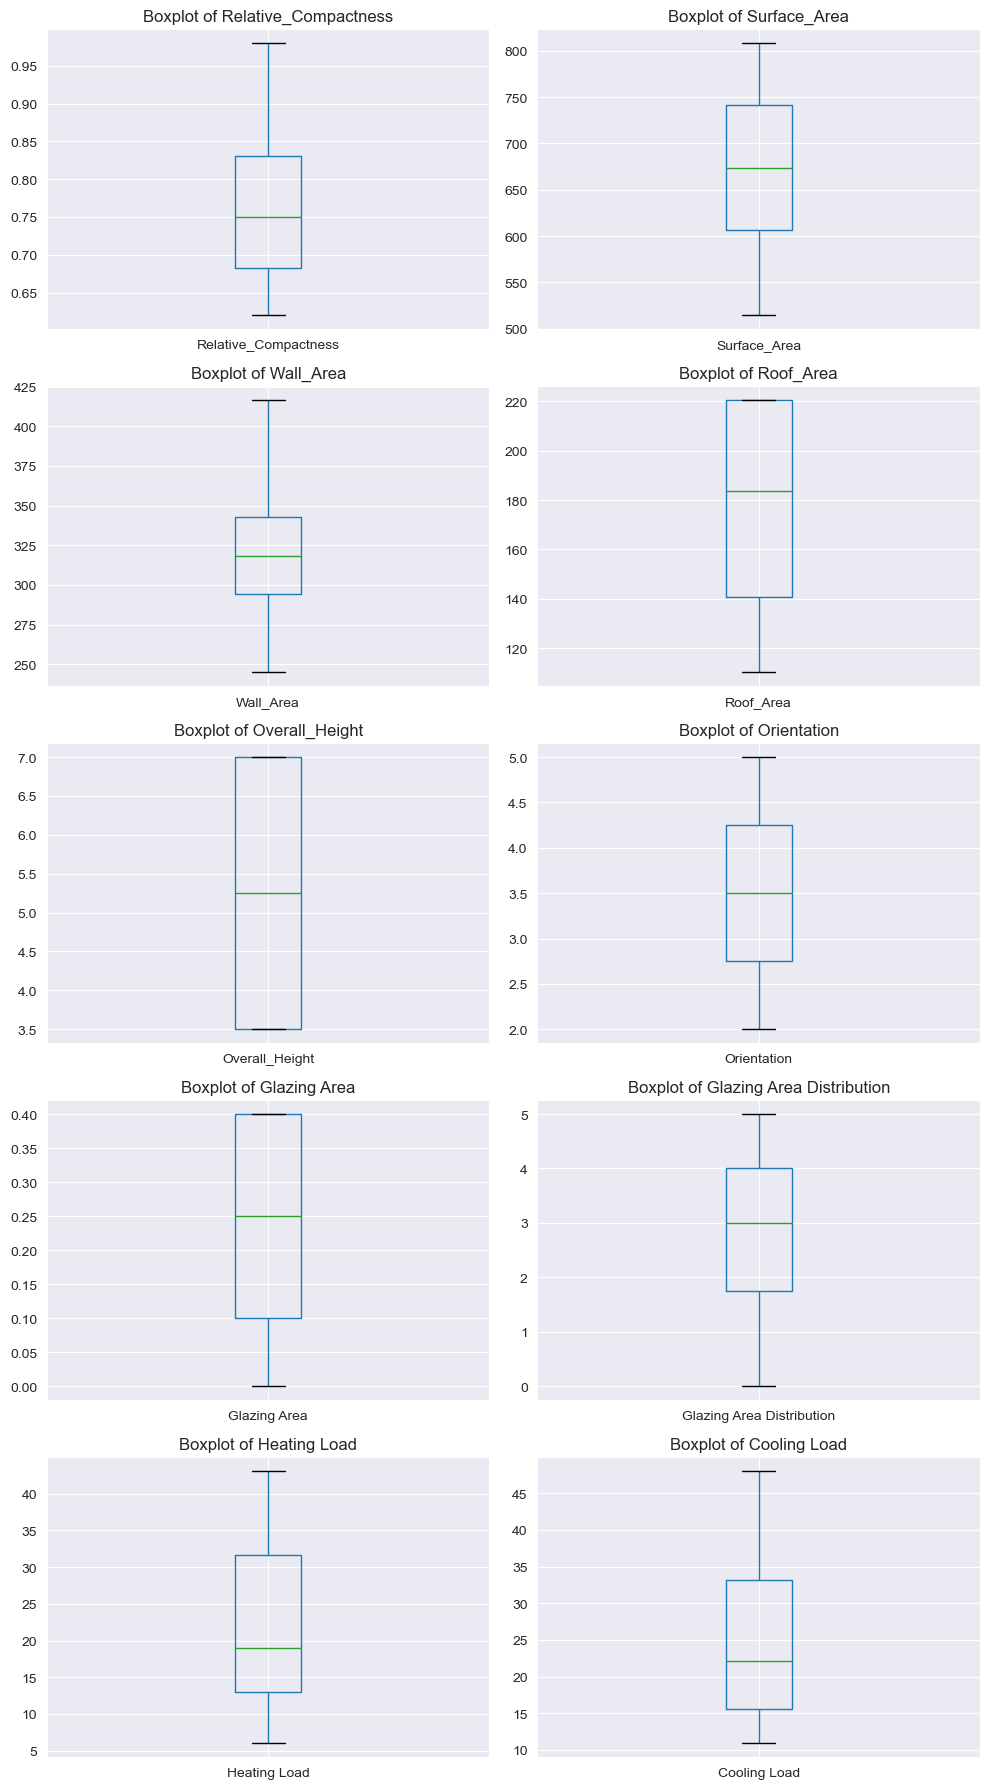

In [10]:
# Boxplot 

columns = 2  # Number of plots per row
rows = (len(dataset.columns) + columns - 1) // columns  # Calculate the necessary number of rows

# Create the grid of subplots
fig, axes = plt.subplots(nrows = rows, ncols=columns, figsize=(10, 18))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each column's boxplot in its corresponding subplot
for i, col in enumerate(dataset.columns):
    dataset.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any unused subplots if the number of columns doesn't fit perfectly
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### 2.2) Análisis bivariante 
En esta sección se va a analizar relaciones entre 2 variables. Se hará un especial enfasis a la relación que tiene las variables objetivo con las features 

#### 2.2.1) Correlación pearson 

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

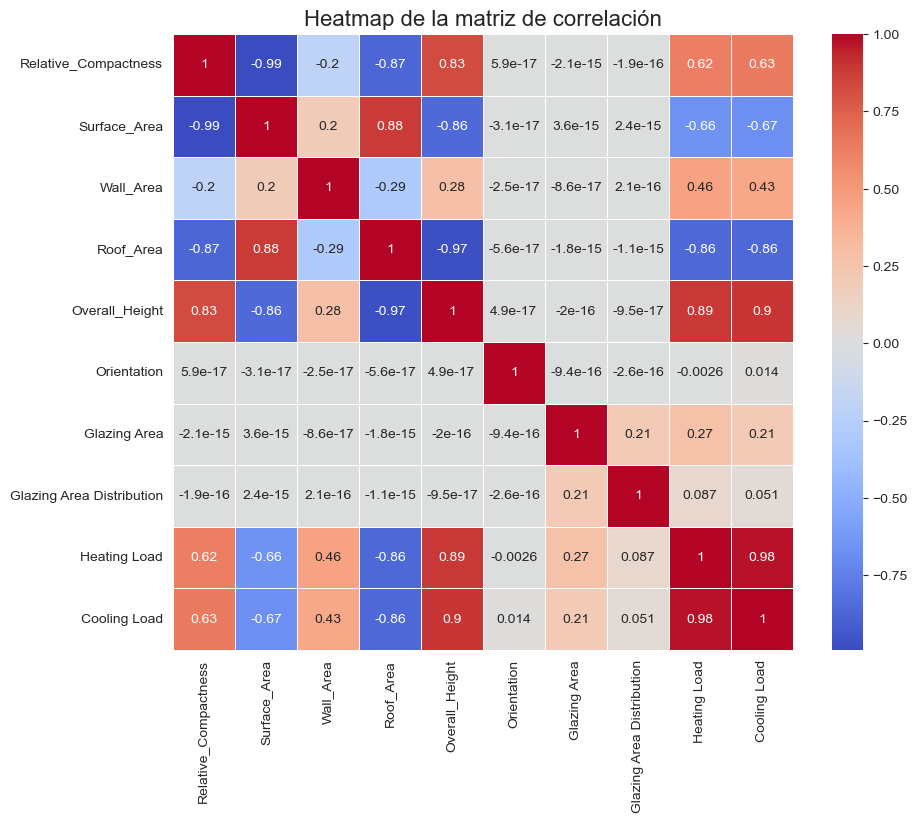

In [13]:
# 1) Definición de la función de correlación entre variables 
def heatmap (data:pd.DataFrame, method:str): 

    # Calcular la matriz de correlación
    correlation_matrix = data.corr(method=method)

    # Crear el heatmap
    plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
    sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

    # Agregar un título
    plt.title("Heatmap de la matriz de correlación", fontsize=16)

    # Mostrar el gráfico
    plt.show()
    
# 2) Ejecución de la función 
heatmap(data=dataset, method="pearson")

#### 2.2.2)  Scatterplot 
Se crearán un Scatter plot entre las fueatures y las variables objetivo 

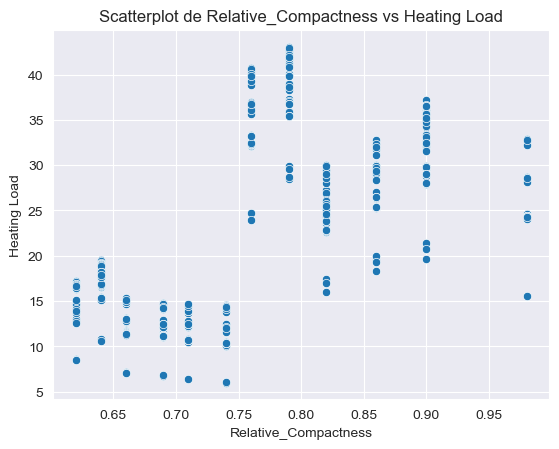

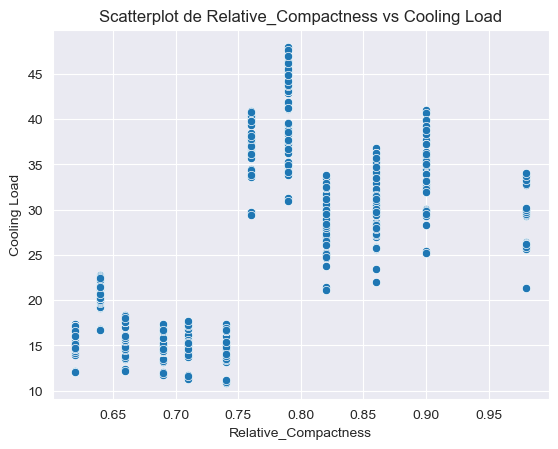

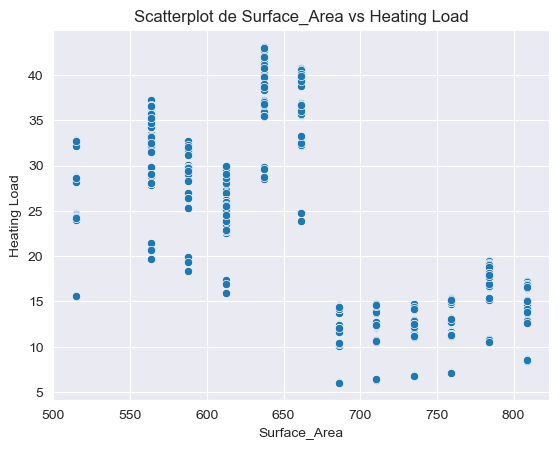

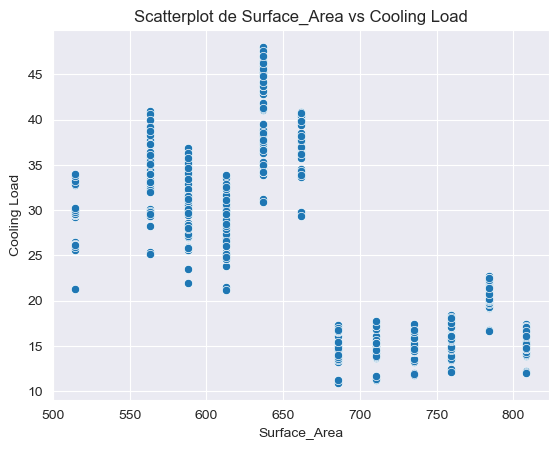

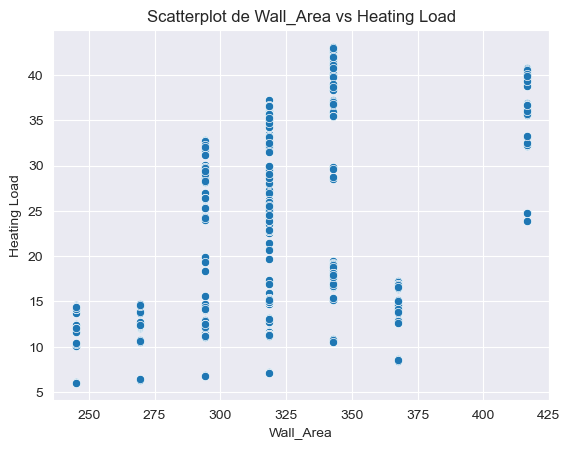

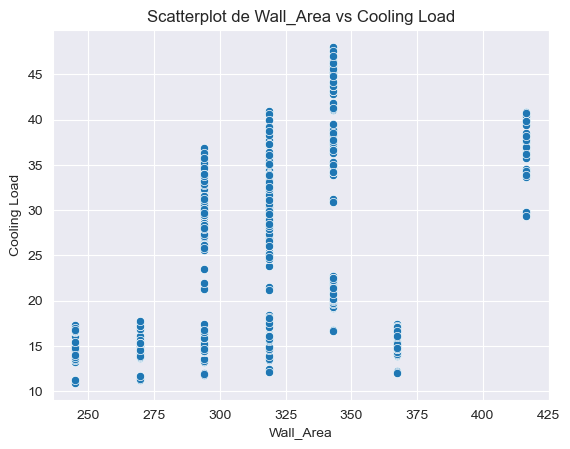

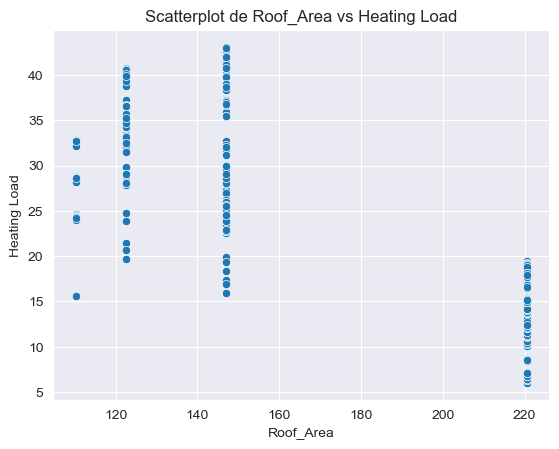

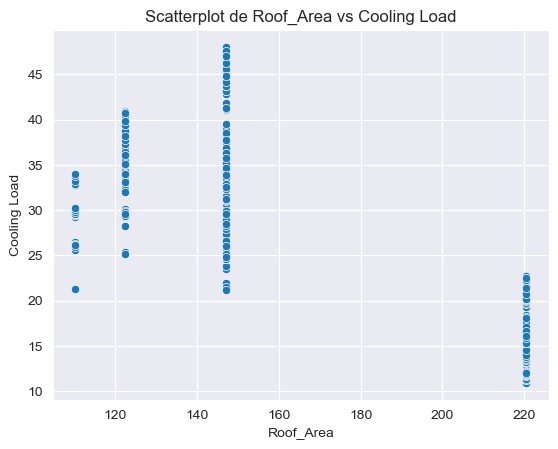

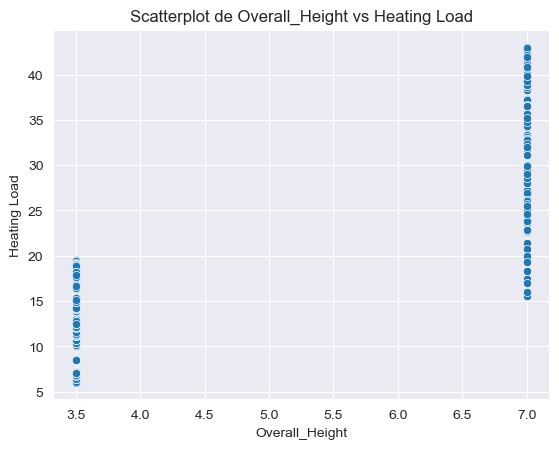

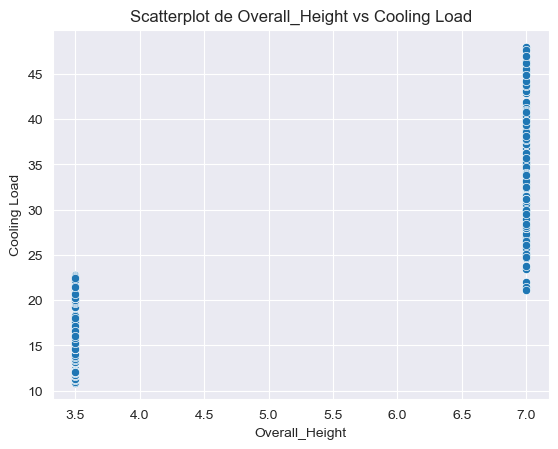

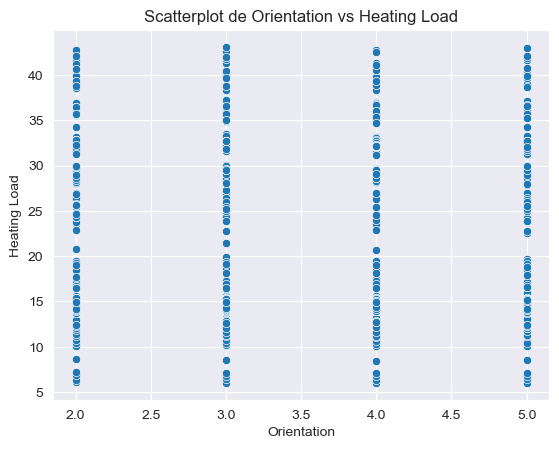

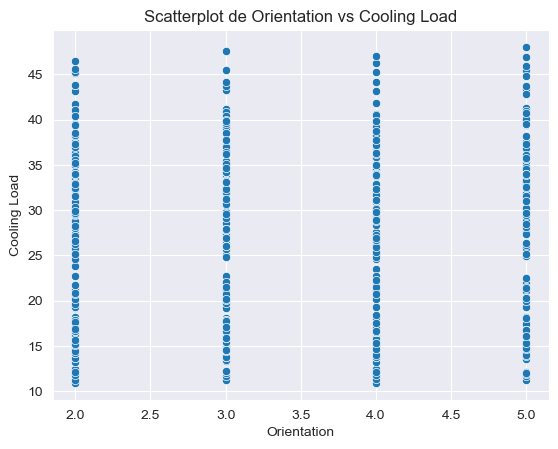

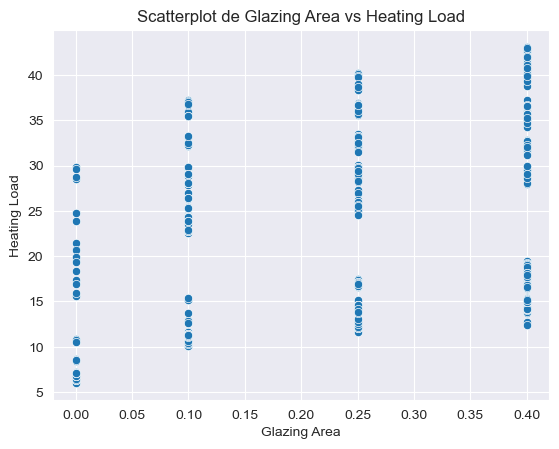

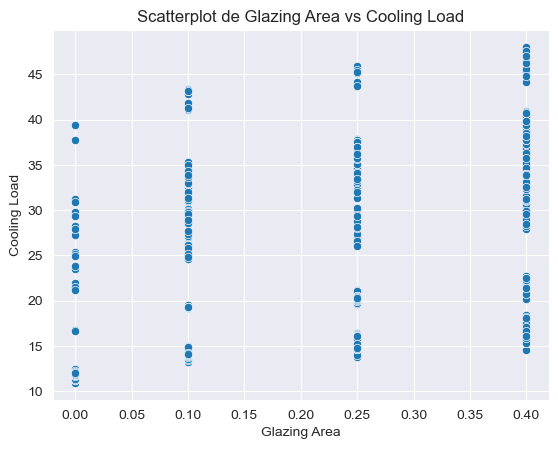

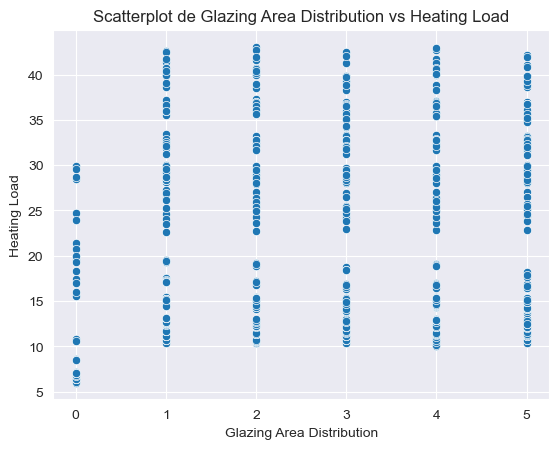

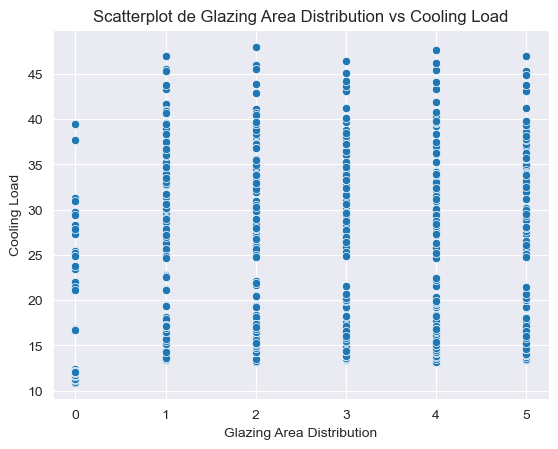

In [14]:
# 1) Creación de la función 
def scatterplot(dataset: pd.DataFrame, x: list, y:list):   
    import seaborn as sns
    import matplotlib.pyplot as plt
    for i in x:
        for w in y: 
            plt.figure()  # Crea una nueva figura para cada gráfico
            sns.scatterplot(data=dataset, x=i, y=w)
            plt.title(f"Scatterplot de {i} vs {w}")  # Agrega un título a cada gráfico
            plt.show()  # Muestra el gráfico y avanza al siguiente
        
# 2) Ejecución de la función
features_columns = list(dataset.drop(columns=["Heating Load", "Cooling Load"]).columns)
targets= ["Heating Load", "Cooling Load"]

scatterplot(dataset=dataset, x=features_columns, y=targets)

## 3) Tranformación de datos

Aspectos destacables: 
  
1) Como se pudo obervar en la etapa de EDA, existen algunas variables númericas que relamente tienen una representación categorica, por tanto es necesario sujetarlos a un proceso de encoding para poder usarlos dentro de nuestros modelos de ML.

2) Dentro de los boxplot no se logro ver ninguna dispersión que conteniera outliers extremadamente atípicos, por lo que no se planteara ningúna metodología de deteción y eliminación de outlieres 

3) No se detectaron valores nulos en el set de datos    
4) Dado que es un conjunto de datos de muy poca dimensionalidad, no se buscará realizar ningúna reducción de esta con algúna método de ML 

### 3.1) Data split 
Antes de cualquier tranformación de datos se realizara la segregación de datos (data split). Dado que es un problema de regresión se optará por usar el método de segregación aleatoria 

In [21]:
#from sklearn.model_selection import train_test_split

# 1) Aislamiento de los features 
#features = dataset.drop(columns=["Heating Load", "Cooling Load"])

# 2) Aislamiento de las variables objetivo 
#cooling_target = dataset[["Cooling Load"]]
#heating_target = dataset[["Heating Load"]]

# 1) Segregación para el cooling 
#X_train, X_test, cooling_train, cooling_test = train_test_split(features, cooling_target, test_size=0.2, random_state=42)

# 2) Segregación para el heating 
#X_train, X_test, heating_train, heating_test = train_test_split(features, heating_target, test_size=0.2, random_state=42)
#print("Cantidad de filas en el set de datos de entrenamiento:", len(X_train))
#X_train.head(n=5)

In [24]:
import numpy as np
import pandas as pd

# 1) Aislamiento de los features 
features = dataset.drop(columns=["Heating Load", "Cooling Load"])

# 2) Aislamiento de las variables objetivo 
cooling_target = dataset[["Cooling Load"]]
heating_target = dataset[["Heating Load"]]

# Get the number of samples
n_samples = len(features)

# Create shuffled indices
indices = np.arange(n_samples)
np.random.seed(42)  # For reproducibility
np.random.shuffle(indices)

# Define the split point (80% for training, 20% for testing)
split_point = int(n_samples * 0.8)

# Split the indices for training and testing
train_indices = indices[:split_point]
test_indices = indices[split_point:]

# Use indices to split the data for cooling
X_train_cooling = features.iloc[train_indices]
X_test_cooling = features.iloc[test_indices]
cooling_train = cooling_target.iloc[train_indices]
cooling_test = cooling_target.iloc[test_indices]

# Use the same indices to split the data for heating
X_train_heating = features.iloc[train_indices]
X_test_heating = features.iloc[test_indices]
heating_train = heating_target.iloc[train_indices]
heating_test = heating_target.iloc[test_indices]

# Print the results
print("Cantidad de filas en el set de datos de entrenamiento:", len(X_train_cooling))
X_train_cooling.head(n=5)



Cantidad de filas en el set de datos de entrenamiento: 614


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing Area,Glazing Area Distribution
668,0.62,808.5,367.5,220.50,3.5,2,0.40,3
324,0.66,759.5,318.5,220.50,3.5,2,0.25,1
624,0.98,514.5,294.0,110.25,7.0,2,0.40,3
690,0.79,637.0,343.0,147.00,7.0,4,0.40,4
473,0.64,784.0,343.0,220.50,3.5,3,0.25,4


In [28]:
X_train = pd.concat([X_train_heating, X_train_cooling], axis=1)
X_test = pd.concat([X_test_heating, X_test_cooling], axis=1)


### 3.2) Escalamiento de variables  numéricas
Se realizará un escalamiento las fetures consideradas numéricas. Como se puede observar existen distintas escalas en el conjuto de datos numericos. En esta sección se escalaran

In [27]:
# 1) Aislamiento de variables numéricas 
#numeric_features = X_train[["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area"]]

# 2) Escalamiento 
#from sklearn.preprocessing import StandardScaler

# 2.1) Importamos el objeto scaler 
#scaler = StandardScaler()

# 2.2) Relizamos la tranformacion 
#scaled_data = scaler.fit_transform(X=numeric_features)

# 3. Convertir el array escalado en un DataFrame nuevamente, con los mismos nombres de columnas
#scaled_dataset = pd.DataFrame(data=scaled_data, columns=numeric_features.columns)
#scaled_dataset

In [30]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()

# Standardize training set
X_train_scaled = (X_train - X_train_mean) / X_train_std

# Standardize test set using training set parameters
X_test_scaled = (X_test - X_train_mean) / X_train_std

X_test_scaled

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing Area,Glazing Area Distribution,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing Area,Glazing Area Distribution
347,0.903673,-0.944534,-0.589444,-0.642217,0.979844,1.334170,0.106471,-0.532194,0.903673,-0.944534,-0.589444,-0.642217,0.979844,1.334170,0.106471,-0.532194
505,-0.232355,0.165938,-1.720438,0.990583,-1.018908,-0.448595,0.106471,1.412848,-0.232355,0.165938,-1.720438,0.990583,-1.018908,-0.448595,0.106471,1.412848
756,-0.989707,0.998791,-0.023946,0.990583,-1.018908,-1.339977,1.233596,1.412848,-0.989707,0.998791,-0.023946,0.990583,-1.018908,-1.339977,1.233596,1.412848
710,-0.989707,0.998791,-0.023946,0.990583,-1.018908,0.442788,1.233596,0.764501,-0.989707,0.998791,-0.023946,0.990583,-1.018908,0.442788,1.233596,0.764501
693,-0.043017,-0.111680,2.238043,-1.186484,0.979844,-0.448595,1.233596,0.764501,-0.043017,-0.111680,2.238043,-1.186484,0.979844,-0.448595,1.233596,0.764501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.043017,-0.111680,2.238043,-1.186484,0.979844,1.334170,-1.020654,-1.180541,-0.043017,-0.111680,2.238043,-1.186484,0.979844,1.334170,-1.020654,-1.180541
106,0.903673,-0.944534,-0.589444,-0.642217,0.979844,0.442788,-1.020654,-0.532194,0.903673,-0.944534,-0.589444,-0.642217,0.979844,0.442788,-1.020654,-0.532194
270,-0.516362,0.443556,-1.154941,0.990583,-1.018908,0.442788,-1.020654,1.412848,-0.516362,0.443556,-1.154941,0.990583,-1.018908,0.442788,-1.020654,1.412848
435,2.039701,-1.777387,-0.589444,-1.458617,0.979844,1.334170,0.106471,0.764501,2.039701,-1.777387,-0.589444,-1.458617,0.979844,1.334170,0.106471,0.764501


### 3.3) Encoding 
Utilizamore el binary encoding para que no se aumente mucho la dimensionalidad del set de datos 

In [31]:
import category_encoders as ce

# 1) Variables categoricas 
categorical_variables = X_train.drop(columns =list(X_test_scaled.columns)) # Eliminamos las variables numericas 

# 2) Crear el codificador de Binary Encoding
encoder = ce.BinaryEncoder(cols=list(categorical_variables.columns))

# Ajustar y transformar los datos
categorical_variables = encoder.fit_transform(X=categorical_variables)
categorical_variables

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 import category_encoders as ce                                                              │
│    2                                                                                             │
│    3 # 1) Variables categoricas                                                                  │
│    4 categorical_variables = X_train.drop(columns =list(X_test_scaled.columns)) # Eliminamos     │
│                                                                                                  │
│ /opt/miniconda3/envs/machine-learning-operations/lib/python3.10/site-packages/category_encoders/ │
│ __init__.py:9 in <module>                                                                        │
│                                                                                                  │
│    6                                                                                             │
│    7 """                                                                                         │
│    8                                                                                             │
│ ❱  9 from category_encoders.backward_difference import BackwardDifferenceEncoder                 │
│   10 from category_encoders.binary import BinaryEncoder                                          │
│   11 from category_encoders.gray import GrayEncoder                                              │
│   12 from category_encoders.count import CountEncoder                                            │
│                                                                                                  │
│ /opt/miniconda3/envs/machine-learning-operations/lib/python3.10/site-packages/category_encoders/ │
│ backward_difference.py:6 in <module>                                                             │
│                                                                                                  │
│    3 from patsy.contrasts import Diff, ContrastMatrix                                            │
│    4 import numpy as np                                                                          │
│    5                                                                                             │
│ ❱  6 from category_encoders.base_contrast_encoder import BaseContrastEncoder                     │
│    7                                                                                             │
│    8 __author__ = 'paulwestenthanner'                                                            │
│    9                                                                                             │
│                                                                                                  │
│ /opt/miniconda3/envs/machine-learning-operations/lib/python3.10/site-packages/category_encoders/ │
│ base_contrast_encoder.py:7 in <module>                                                           │
│                                                                                                  │
│     4 import pandas as pd                                                                        │
│     5 from patsy.contrasts import ContrastMatrix                                                 │
│     6 import numpy as np                                                                         │
│ ❱   7 from category_encoders.ordinal import OrdinalEncoder                                       │
│     8 import category_encoders.utils as util                                                     │
│     9 import warnings                                                                            │
│    10                                                      

**UNION DE DATOS**

In [ ]:
# 1) Reseteo del indice de los pandas DF 
scaled_dataset.reset_index(drop=True, inplace=True)
categorical_variables.reset_index(drop=True, inplace=True)
X_train = pd.concat(objs=[scaled_dataset, categorical_variables], axis=1)
X_train

## 4) Desarrollo del modelo ML 
Se exploraran los siguientes modelos: 

- Linear regression  
- Random forest 
- Xbgoost 

Adicionalmente, se hará una experimentación con los modelos. Usando la herramienta de MLflow. 

In [ ]:
## AQUI VAMOS !!!
a = 2 
a 



 ### 4.1) Entrenamiento y evaluación de modelos tentativos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
# 1) Creación de la función de entrenamiento y evaluación  
def train_and_evaluate_models(X:pd.DataFrame, y:pd.DataFrame): # Indicamos como parámetros el conjunto de datos de entrenamiento y evaluación 
    # Definimos los modelos dentro de un diccionario 
    diccionario_modelos = {
        "Linear Regression": LinearRegression(n_jobs=-1),
        "Random Forest": RandomForestRegressor(n_estimators=100, n_jobs=-1),
        "XGBoost": XGBRegressor(n_estimators=100, use_label_encoder=False, eval_metric='rmse')
    }
    
    # Almacenar los resultados de validación cruzada
    results = {}
    
    for i in diccionario_modelos:
        # Extracción del modelo del diccionario. 
        model = diccionario_modelos[i]
        
        # Ejecutamos un cross validation 
        cv_scores = cross_val_score(estimator=model, 
                                    X= X, y= y, cv=5, 
                                    scoring='r2', n_jobs=-1) # devuelve una lista de los scores de cada iteración 
        
        # Guardamos los resultados en el diccionario 
        results[i] = cv_scores
       # print(f"{model_name}: R2 Score Mean = {np.mean(cv_scores):.3f}, Std = {np.std(cv_scores):.3f}")
    
    return results

In [ ]:
# 2) Ejecución de la funcion 
resultados = train_and_evaluate_models(X=X_train, y=cooling_train)
resultados

**Media R2 por modelo**

In [ ]:
for i in resultados: 
    media = resultados[i].mean()
    print(f"Media del R2 del modelo {i}:", media)

**VISUALIZACION DE RESULTADOS**

In [ ]:
# Visualizacion de resultados por modelo 
# Convertir los resultados en un DataFrame para facilitar la visualización
results_df = pd.DataFrame(data=resultados)

# Generar el boxplot para visualizar la variabilidad de los resultados
plt.figure(figsize=(8, 4))
results_df.boxplot()
plt.title("Variabilidad de los R2 Scores por Modelo")
plt.ylabel("R2 Score")
plt.show()

### 4.2) Tueno de mejor modelo
Como se pudo observar en la visualización anterior el modelo con menor variabilidad de presición y mayor presición es el de Xgboost, con una media del 98% 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo de XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir los hiperparámetros que queremos probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Definir el GridSearchCV con la métrica de R2
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',  # Usar R² como métrica
    cv=5,          # 5-fold cross-validation
    n_jobs=-1,     # Usar todos los núcleos disponibles
    verbose=1      # Mostrar el proceso
)

# Ajustar el modelo con el ajuste de hiperparámetros
grid_search.fit(X=X_train, y =cooling_train)

# Mostrar los mejores hiperparámetros encontrados y el puntaje asociado
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor R²:", grid_search.best_score_) 

Como se puede observar el valo de R2 mejoro ligeramente con respecto a la media de la ejecución anterior. 

### 4.3) Inspección final (determinación de overfitting o underfitting)